In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns 
import copy
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action="ignore")
seed = 0

In [2]:

# Read the CSV file
df = pd.read_csv('../data/heart_encoding.csv')
# Print the contents of the DataFrame
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ChestPainType   917 non-null    int64  
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    int64  
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    int64  
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int64  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    int64  
 11  HeartDisease    917 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.1 KB


In [4]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000,917.000000
mean,53.509269,0.789531,0.779716,132.540894,240.600872,0.233370,0.989095,136.789531,0.404580,0.886696,1.36205,0.552890
std,9.437636,0.407864,0.956193,17.999749,54.009298,0.423206,0.632016,25.467129,0.491078,1.066960,0.60727,0.497466
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,214.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.00000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.00000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.00000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000,1.000000


In [5]:
selected_features = ['RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
X = df[selected_features]

In [6]:
scaler = StandardScaler()
X[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(X[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

In [7]:
# Applying k-means algorithm
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [8]:
# Retrieve cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [9]:
# Add cluster labels to the original dataset
df['Cluster'] = cluster_labels


In [10]:
# Print the cluster centroids
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1} centroid: {centroid}")

Cluster Centroids:
Cluster 1 centroid: [-0.16277962 -0.27288037  0.26666667  0.95833333 -0.25364936  0.69583333
  1.16552248  0.91666667]
Cluster 2 centroid: [ 0.08136415 -0.47855557  0.30092593  1.22222222 -0.93772878  0.4212963
 -0.53715177  1.36574074]
Cluster 3 centroid: [ 0.92034857  1.43527749  0.26573427  0.94405594 -0.12415553  0.6013986
  0.31741002  1.21678322]
Cluster 4 centroid: [-0.34628111 -0.11441946  0.14779874  0.87421384  0.88421228  0.08490566
 -0.65751649  1.76100629]


In [11]:
tsne = TSNE()

In [12]:
Z = tsne.fit_transform(X)


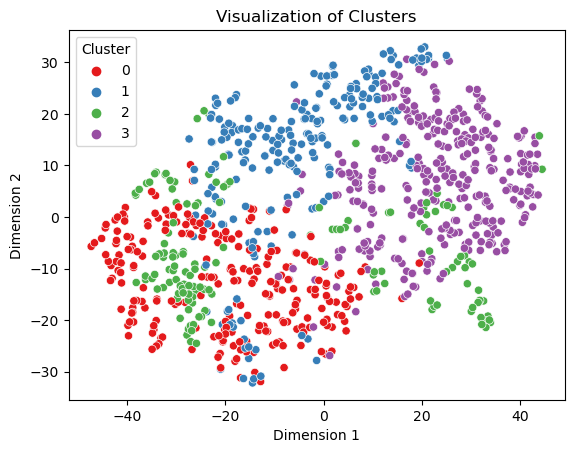

In [13]:
sns.scatterplot(x=Z[:, 0], y=Z[:, 1], hue=cluster_labels, palette='Set1')
plt.title("Visualization of Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Cluster")
plt.show()

Finding the optimal number of clusters using Elbow method

In [14]:
wcss = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(X)
    wcss.append(km.inertia_)

In [15]:
wcss

[3799.6044184019142,
 3362.7264809091726,
 3046.3238917201866,
 2785.0192848332936,
 2634.0789992171367,
 2478.3593203816886,
 2351.3734275691954,
 2257.7675241488014,
 2159.7186991429658,
 2091.3990165514992,
 2023.2764476572243,
 1979.8557764589025,
 1923.4168971604813]

In [16]:
km = KMeans(n_clusters = len(X))
km.fit(X)
km.inertia_

0.0

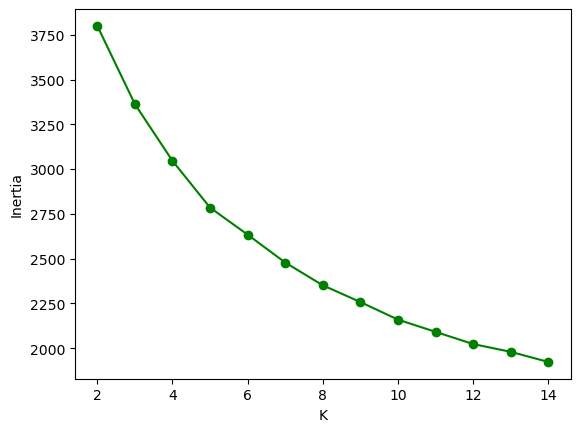

In [17]:
plt.plot(range(2,15), wcss, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

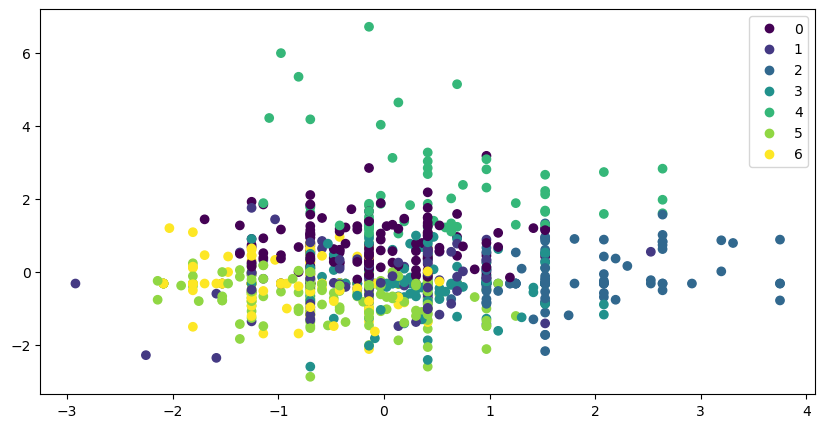

In [18]:
km = KMeans(n_clusters = 7, random_state=seed)
km.fit(X)

plt.figure(figsize=(10,5))
scatter = plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)
plt.xlabel('')
plt.ylabel('')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4, 5, 6, 7]);

In [19]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 5)
km.fit(X)
silhouette_score(X, km.labels_)

0.16369338406475045

In [20]:
sil_scores = [] 
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

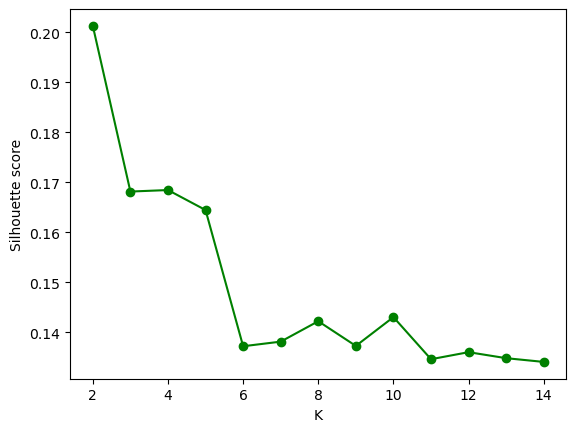

In [21]:
plt.plot(range(2,15), sil_scores, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

Apply PCA

In [22]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [23]:
# Apply t-SNE on the PCA-transformed data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

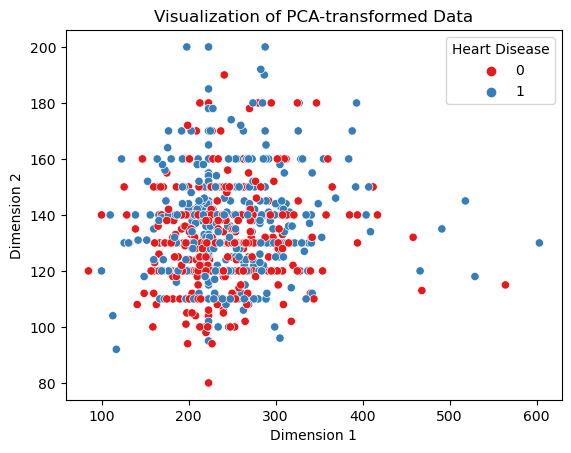

In [24]:
# Create a scatter plot to visualize the t-SNE transformed data
sns.scatterplot(x=df['Cholesterol'], y=df['RestingBP'], hue=df['HeartDisease'], palette='Set1')
plt.title("Visualization of PCA-transformed Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Heart Disease")
plt.show()